In [85]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [100]:
g = nx.karate_club_graph() # defining our community

Zachary's Karate Club


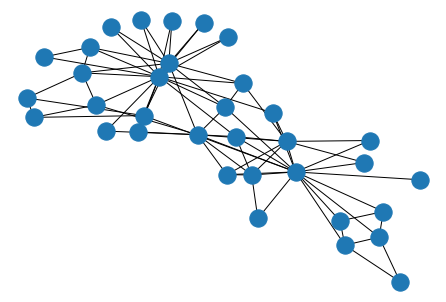

In [101]:
pos1 = nx.spring_layout(g)
nx.draw(g,wiht_label = True) # presenting our graph

In [114]:
A = nx.adjacency_matrix(g) # using netowrkx package we define our adjacency matrix
L = nx.laplacian_matrix(g) # laplacian matrix
print(A.todense())
print(L.todense())

[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]
[[16 -1 -1 ... -1  0  0]
 [-1  9 -1 ...  0  0  0]
 [-1 -1 10 ...  0 -1  0]
 ...
 [-1  0  0 ...  6 -1 -1]
 [ 0  0 -1 ... -1 12 -1]
 [ 0  0  0 ... -1 -1 17]]


[-0.11213744 -0.0412879   0.02321895 -0.0554998  -0.2846045  -0.32372718
 -0.32372718 -0.05258602  0.05160127  0.09280089 -0.2846045  -0.21099308
 -0.10946132 -0.01474199  0.1627508   0.1627508  -0.42276527 -0.10018145
  0.1627508  -0.01363714  0.1627508  -0.10018145  0.1627508   0.15569458
  0.15302559  0.16096293  0.18710958  0.12766405  0.0951523   0.16765033
  0.07349963  0.09875343  0.13034546  0.11890327]
[(0, 2), (0, 8), (0, 31), (1, 2), (1, 30), (2, 3), (2, 7), (2, 13), (13, 33), (19, 33)]


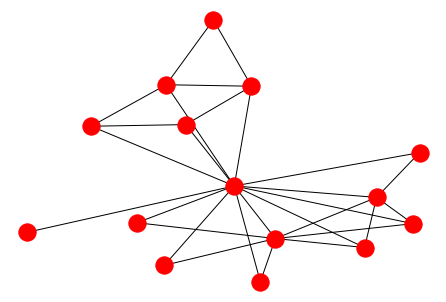

In [110]:
f = nx.fiedler_vector(g) # defining fiedler vector
print(f)
color_map = []
su = sum(f) 
A = []
B = []
# graph bisection algorithm
for i in range(len(f)):
    if f[i] < 0 : 
        color_map.append('blue')
        A.append(i)
    else:
        color_map.append('red')    
        B.append(i)
H = g.subgraph(A) # graph partions as sub-graphs
E = g.subgraph(B)
cut = [] # edges that are deleted to partion graph
for e in g.edges():
    if e not in H.edges and e not in E.edges :
        cut.append(e)
print(cut)
print(len(cut))
pos1 = nx.spring_layout(H)
for key in pos1:
    pos1[key] = 1+pos1[key]
pos2 = nx.spring_layout(E)
nx.draw(H,pos1, node_color='red')
plt.show()

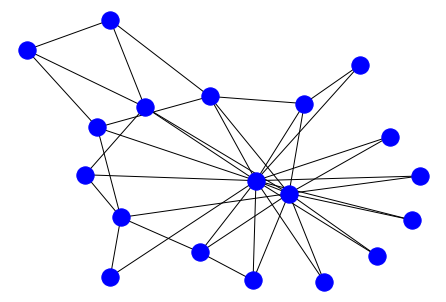

In [108]:
nx.draw(E,pos2, node_color='blue')
plt.show()

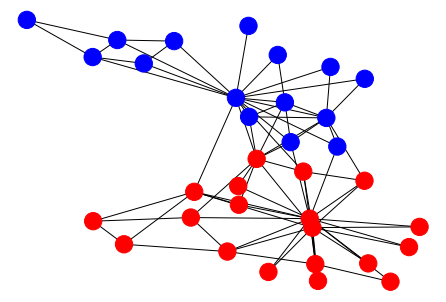

In [112]:

f = nx.fiedler_vector(g)
color_map = []
su = sum(f) 
A = []
B = []
for i in range(len(f)):
    if f[i] < 0 :
        color_map.append('blue')
        
    else:
        color_map.append('red')    
        B.append(i)
nx.draw(g,node_color = color_map)
plt.show()


In [90]:
# defeing a function to present our partions
def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos


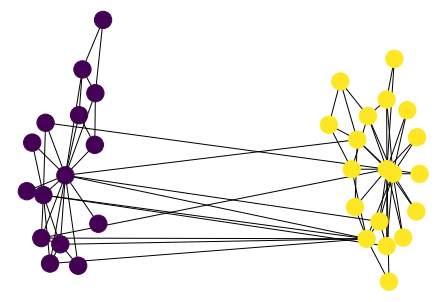

In [104]:
def find(g):
    dic = {} 
    f = nx.fiedler_vector(g)
    for i in range(len(f)):
        if f[i] < 0:
            dic[i] = 0
        else:
            dic[i] = 1
    return dic
partition = find(g) 
pos = community_layout(g, partition)

nx.draw(g, pos, node_color=list(partition.values())); plt.show()
#plt.savefig("zackary.png")